In [75]:
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import pandas as pd

In [64]:
def make_tac_pwr_plots(N, data_dir):
    plot_data_dict = {}
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            filename = os.path.join(root, file)
            plot_data_dict[file] = []
            with open(filename, "r") as csvfile:
                file_len = len(list(csvfile))-1
                print(file_len)
                T = file_len/N
                print(T)
                xf = fftfreq(N, T)[:N//2]
                print(xf)
                count = 1
                for row in csvfile:
                    if count == 1:
                        continue
                    print(row)
                    x = np.array([float(data) for data in row.split(", ")[:-5]])                   
                    yf = fft(x)
                    plot_data = {"X": xf, "Y": 2.0/N * np.abs(yf[0:N//2])}
                    plot_data_dict[file].append(plot_data)
                    #plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    return(plot_data_dict)

In [65]:
plot_data_dict = make_tac_pwr_plots(61441, r"C:\Users\hcollins\Documents\Tac Power Data\Refridgerator\Test data")

520834
8.476977913770934
[0.00000000e+00 1.91999754e-06 3.83999508e-06 ... 5.89765645e-02
 5.89784845e-02 5.89804045e-02]


IndexError: list index out of range

In [15]:
type(plot_data_dict)

dict

In [16]:
plot_data_dict.keys()

dict_keys(['Real-Time-Data_2021715_112255.csv'])

In [18]:
plot_data_dict['Real-Time-Data_2021715_112255.csv']

[]

In [105]:
a = r"C:\Users\hcollins\Documents\Tac Power Data\Refridgerator\Fridge_Processed\Real-Time-Data_2021715_132552_analyzed.xlsx"

In [107]:
b = pd.read_excel(a)

In [110]:
b["FFT"] = fft(np.array(b["20B_L2"]))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

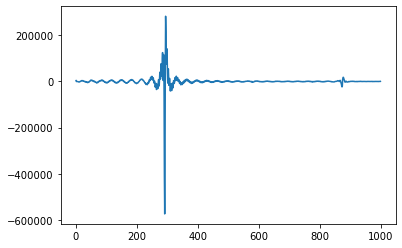

In [114]:
b["FFT"].head(1000).plot()

<AxesSubplot:>

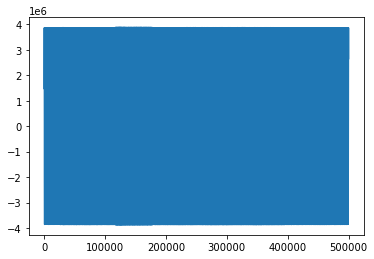

In [104]:
b.iloc[:,2].head(500000).plot()

In [91]:
for row in b.iterrows():
    row_lst = []
    for x in range(36):
        row_lst.append(row[x])
        print(row[x])
    input()

0
0       -3842897.0
1        2472057.0
2        1480010.0
3          -4194.0
4         -13644.0
5           1063.0
6           2250.0
7           3443.0
8          17954.0
9          -4146.0
10         14889.0
11             1.0
12         -9607.0
13          -829.0
14          -743.0
15         22142.0
16          8205.0
17          3639.0
18          1482.0
19           148.0
20           471.0
21          3535.0
22        -10233.0
23          2418.0
24        -20061.0
25         -1795.0
26        -10433.0
27          9571.0
28        -12853.0
29          1832.0
30          5722.0
31           899.0
32        deadbeef
33             0.0
34    1626362566.0
35     988069076.0
36                
Name: 0, dtype: object


IndexError: tuple index out of range